# Tech - manipulation de données avec pandas

[pandas](https://pandas.pydata.org/) est la librairie incontournable pour manipuler les données. Elle manipuler aussi bien les données sous forme de tables qu'elle écrit ou lit celles-ci en différents formats. Elle permet également de créer facilement des graphes.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Enoncé

La librairie [pandas](https://pandas.pydata.org/) implémente la classe [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). C'est une structure de table, chaque colonne porte un nom et contient un seul type de données. C'est très similaire au langage [SQL](https://fr.wikipedia.org/wiki/Structured_Query_Language).

### Création d'un dataframe

Il existe une grande variété pour créer un DataFrame. Voici les deux principaux. Le premier : une liste de dictionnaire. Chaque clé est le nom de la colonne.

In [3]:
from pandas import DataFrame

rows = [{'col1': 0.5, 'col2': 'schtroumph'},
        {'col1': 0.6, 'col2': 'schtroumphette'}]
DataFrame(rows)

,col1,col2
0,0.5,schtroumph
1,0.6,schtroumphette


La lecture depuis un fichier :

In [4]:
%%writefile data.csv

col1,col2
0.5,alpha
0.6,beta

Writing data.csv


In [5]:
from pandas import read_csv
df = read_csv('data.csv')
df

,col1,col2
0,0.5,alpha
1,0.6,beta


### La maîtrise des index

Les index fonctionnent à peu près comme [numpy](https://numpy.org/) mais offre plus d'options puisque les colonnes mais aussi les lignes ont un nom.

Accès par colonne

In [6]:
df['col1']

0    0.5
1    0.6
Name: col1, dtype: float64

In [7]:
df[['col1', 'col2']]

,col1,col2
0,0.5,alpha
1,0.6,beta


Accès par ligne (uniquement avec ``:``). On se sert principalement de l'opérateur ``:`` pour les lignes.

In [8]:
df[:1]

,col1,col2
0,0.5,alpha


Accès par positions avec [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).

In [9]:
df.loc[0, 'col1']

0.5

Accès par positions entières avec [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html).

In [10]:
df.iloc[0, 0]

0.5

### La maîtrise des index des lignes

La création d'un dataframe donne l'impression que les index des lignes sont des entiers mais cela peut être changer

In [11]:
dfi = df.set_index('col2')
dfi

,col1
col2,
alpha,0.5
beta,0.6


In [12]:
dfi.loc['alpha', 'col1']

0.5

Il faut se souvenir de cette particularité lors de la fusion de tables.

### La maîtrise des index des colonnes

Les colonnes sont nommées.

In [13]:
df.columns

Index(['col1', 'col2'], dtype='object')

On peut les renommer.

In [14]:
df.columns = ["valeur", "nom"]
df

,valeur,nom
0,0.5,alpha
1,0.6,beta


L'opérateur ``:`` peut également servir pour les colonnes.

In [15]:
df.loc[:, 'valeur':'nom']

,valeur,nom
0,0.5,alpha
1,0.6,beta


### Lien vers numpy

[pandas](https://pandas.pydata.org/) utilise [numpy](https://numpy.org/) pour stocker les données. Il est possible de récupérer des matrices depuis des DataFrame avec [values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html).

In [16]:
df.values

array([[0.5, 'alpha'],
       [0.6, 'beta']], dtype=object)

In [17]:
df[['valeur']].values

array([[0.5],
       [0.6]])

### La maîtrise du nan

[nan](https://numpy.org/doc/stable/reference/constants.html) est une convention pour désigner une valeur manquante.

In [18]:
rows = [{'col1': 0.5, 'col2': 'schtroumph'},
        {'col2': 'schtroumphette'}]
DataFrame(rows)

,col1,col2
0,0.5,schtroumph
1,NaN,schtroumphette


### La maîtrise des types

Un dataframe est défini par ses dimensions et chaque colonne a un type potentiellement différent.

In [19]:
df.dtypes

valeur    float64
nom        object
dtype: object

On peut changer un type, donc convertir toutes les valeurs d'une colonne vers un autre type.

In [20]:
import numpy
df['valeur'].astype(numpy.float32)

0    0.5
1    0.6
Name: valeur, dtype: float32

In [21]:
import numpy
df['valeur'].astype(numpy.int32)

0    0
1    0
Name: valeur, dtype: int32

### Création de colonnes

On peut facilement créer de nouvelles colonnes.

In [22]:
df['sup055'] = df['valeur'] >= 0.55
df

,valeur,nom,sup055
0,0.5,alpha,False
1,0.6,beta,True


In [23]:
df['sup055'] = (df['valeur'] >= 0.55).astype(numpy.int64)
df

,valeur,nom,sup055
0,0.5,alpha,0
1,0.6,beta,1


In [24]:
df['sup055+'] = df['valeur'] + df['sup055']
df

,valeur,nom,sup055,sup055+
0,0.5,alpha,0,0.5
1,0.6,beta,1,1.6


### Modifications de valeurs

On peut les modifier une à une en utilisant les index. Les notations sont souvent intuitives. Elles ne seront pas toutes détaillées. Ci-dessous un moyen de modifer certaines valeurs selon une condition.

In [25]:
df.loc[df['nom'] == 'alpha', 'sup055+'] += 1000
df

,valeur,nom,sup055,sup055+
0,0.5,alpha,0,1000.5
1,0.6,beta,1,1.6


### Une erreur ou warning fréquent

In [26]:
rows = [{'col1': 0.5, 'col2': 'schtroumph'},
        {'col1': 1.5, 'col2': 'schtroumphette'}]
df = DataFrame(rows)
df

,col1,col2
0,0.5,schtroumph
1,1.5,schtroumphette


In [27]:
df1 = df[df['col1'] > 1.]
df1

,col1,col2
1,1.5,schtroumphette


In [28]:
df1["col3"] = df1["col1"] + 1.
df1

c:\python372_x64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,col1,col2,col3
1,1.5,schtroumphette,2.5


``A value is trying to be set on a copy of a slice from a DataFrame.`` : Par défaut, l'instruction ``df[df['col1'] > 1.]`` ne crée pas un nouveau DataFrame, elle crée ce qu'on appelle une vue pour éviter de copier les données. Le résultat ne contient que l'index des lignes qui ont été sélectionnées et un lien vers le dataframe original. L'avertissement stipule que *pandas* ne peut pas modifier le dataframe original mais qu'il doit effectuer une copie.

### La maîtrise des fonctions

Les fonctions de pandas créent par défaut un nouveau dataframe plutôt que de modifier un dataframe existant. Cela explique pourquoi parfois la mémoire se retrouve congestionnée. La page [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) est un bon début.

* **création** : [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
* **index** : [set_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html), [reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)
* **utilitaires** : [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html), [isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html), [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html), [to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html), [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html), [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html), [values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html), [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html), [tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html), [isin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html), [T](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html), [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
* **concaténation** : [concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)
* **SQL** : [filter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html), [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html), [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html), [pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html), [pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html)
* **calcul** : [sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html), [cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html), [quantile](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html), [var](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html)

### On récupère les données du COVID par région et par âge et premier graphe

A cette adresse : [Données hospitalières relatives à l'épidémie de COVID-19](https://www.data.gouv.fr/en/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/)

In [29]:
from pandas import read_csv
url = "https://www.data.gouv.fr/en/datasets/r/08c18e08-6780-452d-9b8c-ae244ad529b3"
covid = read_csv(url, sep=";")
covid.tail()

,reg,cl_age90,jour,hosp,rea,rad,dc
40585,94,59,2020-10-09,6,1,45,1
40586,94,69,2020-10-09,6,3,47,4
40587,94,79,2020-10-09,10,3,70,16
40588,94,89,2020-10-09,4,0,46,30
40589,94,90,2020-10-09,3,0,23,14


In [30]:
from pandas import to_datetime
covid['jour'] = to_datetime(covid['jour'])
covid.tail()

,reg,cl_age90,jour,hosp,rea,rad,dc
40585,94,59,2020-10-09,6,1,45,1
40586,94,69,2020-10-09,6,3,47,4
40587,94,79,2020-10-09,10,3,70,16
40588,94,89,2020-10-09,4,0,46,30
40589,94,90,2020-10-09,3,0,23,14


In [31]:
agg_par_jour = covid.drop(['reg', 'cl_age90'], axis=1).groupby('jour').sum()
agg_par_jour.tail()

,hosp,rea,rad,dc
jour,,,,
2020-10-05,14500,2806,196648,42865
2020-10-06,14709,2824,197871,42988
2020-10-07,14979,2800,198866,43148
2020-10-08,15156,2826,199888,43299
2020-10-09,15639,2869,200928,43424


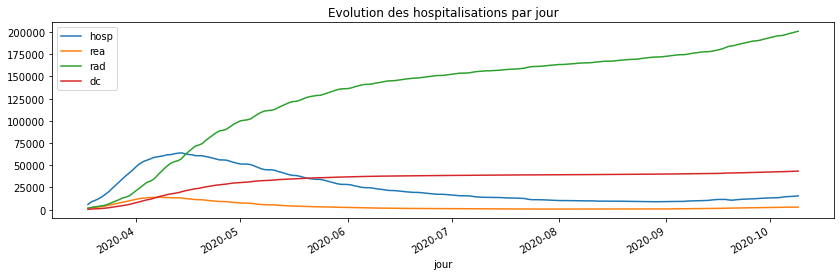

In [32]:
agg_par_jour.plot(title="Evolution des hospitalisations par jour", figsize=(14, 4));

### Q1 : refaire le graphique précédent pour votre classe d'âge

### Q2 : faire de même avec les séries différenciées

### Q3 : faire de même avec des séries lissées sur sur 7 jours

### Q4 : fusion de tables par départements

On récupère deux jeux de données :
* [Données hospitalières relatives à l'épidémie de COVID-19](https://www.data.gouv.fr/en/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/)
* [Indicateurs de suivi de l’épidémie de COVID-19](https://www.data.gouv.fr/fr/datasets/indicateurs-de-suivi-de-lepidemie-de-covid-19/)

In [36]:
hosp = read_csv("https://www.data.gouv.fr/en/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7",
               sep=";")
hosp.tail()

,dep,sexe,jour,hosp,rea,rad,dc
62416,974,1,2020-10-09,33,8,210,9
62417,974,2,2020-10-09,19,3,208,14
62418,976,0,2020-10-09,9,4,462,29
62419,976,1,2020-10-09,7,4,216,18
62420,976,2,2020-10-09,2,0,240,11


In [37]:
indic = read_csv("https://www.data.gouv.fr/fr/datasets/r/4acad602-d8b1-4516-bc71-7d5574d5f33e",
                encoding="ISO-8859-1")
indic.tail()

,extract_date,departement,region,libelle_reg,libelle_dep,tx_incid,R,taux_occupation_sae,tx_pos,tx_incid_couleur,R_couleur,taux_occupation_sae_couleur,tx_pos_couleur,nb_orange,nb_rouge
20801,2020-09-09,84,93,Provence Alpes Côte d'Azur,Vaucluse,94.12,NaN,22.6,6.998940,rouge,NaN,vert,orange,1,1
20802,2020-09-10,84,93,Provence Alpes Côte d'Azur,Vaucluse,87.17,NaN,23.3,6.490576,rouge,NaN,vert,orange,1,1
20803,2020-09-11,84,93,Provence Alpes Côte d'Azur,Vaucluse,81.11,1.05,25.2,6.052142,rouge,orange,vert,orange,2,1
20804,2020-09-12,84,93,Provence Alpes Côte d'Azur,Vaucluse,80.39,NaN,27.0,5.983019,rouge,NaN,vert,orange,1,1
20805,2020-09-19,84,93,Provence Alpes Côte d'Azur,Vaucluse,81.82,NaN,32.0,6.107784,rouge,NaN,orange,orange,2,1


Le code suivant explique comment trouver la valeur ``ISO-8859-1``.

In [38]:
# import chardet
# with open("indicateurs-covid19-dep.csv", "rb") as f:
#     content = f.read()
# chardet.detect(content)  # {'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

### Q5 : une carte ?

Tracer une carte n'est jamais simple. Il faut tout d'abord récupérer les coordonnées des départements : [Contours des départements français issus d'OpenStreetMap](https://www.data.gouv.fr/en/datasets/contours-des-departements-francais-issus-d-openstreetmap/). Ensuite, le code qui suit vous paraîtra peut-être un peu mystérieux. Il vous faudra suivre tous les liens qui explique comment il a été construit.

## Réponses